<a href="https://www.kaggle.com/code/emigiupponi/correlation-between-btc-and-traditional-assets?scriptVersionId=108485885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%reset


In [2]:
clear ()

# Import data

# BTC - Coinmetrics

In [3]:
pip install coinmetrics-api-client

  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.3.1 requires typer<0.5.0,>=0.3.0, but you have typer 0.6.1 which is incompatible.
spacy 3.3.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install coinmetrics-api-client -U

Note: you may need to restart the kernel to use updated packages.


In [5]:
from os import environ
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
from pytz import timezone as timezone_conv
from datetime import timezone as timezone_info

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12,8)})
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")


client = CoinMetricsClient(api_key)

assets = ['btc', 'eth']
asset_mapping = {i: assets[i] for i in range(len(assets))}
print(asset_mapping)

import pandas as pd
from coinmetrics.api_client import CoinMetricsClient
api_key = '<api_key>'
client = CoinMetricsClient()

{0: 'btc', 1: 'eth'}


In [7]:
end_time = datetime.now().strftime('%Y-%m-%d')
asset_metrics = client.get_asset_metrics(
    assets='btc', 
    metrics=['PriceUSD'], 
    start_time='2011-01-01T00:00:00Z', 
    end_time=end_time
)
btc_api = asset_metrics.to_dataframe()

In [8]:
btc_api['time'] = btc_api['time'].dt.strftime("%Y-%m-%d")
btc_api = btc_api [['time', 'PriceUSD']]
btc_api.columns = ['time', 'btc_p']

# Market assets
https://www.kaggle.com/code/asimislam/stock-performance-with-yahoo-finance-yfinance

FRED

API: 35ca786e9d0c63aa7ce633e16c81735f 

S&P500: S&P Dow Jones Indices LLC, S&P 500 [SP500], retrieved from FRED®, Federal Reserve Bank of St. Louis; http://fred.stlouisfed.org/series/SP500 Daily value is as of 4:00 PM New York time.

Gold: ICE Benchmark Administration Limited (IBA), Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars [GOLDAMGBD228NLBM], retrieved from FRED®, Federal Reserve Bank of St. Louis; http://fred.stlouisfed.org/series/GOLDAMGBD228NLBM Daily value is as of 10:30 AM London time.

Dollar Index: Board of Governors of the Federal Reserve System (US), Trade Weighted U.S. Dollar Index: Broad, Goods and Services [DTWEXBGS], retrieved from FRED®, Federal Reserve Bank of St. Louis; http://fred.stlouisfed.org/series/DTWEXBGS Daily value is as of 12:00 PM New York time.

VIX: Chicago Board Options Exchange, CBOE Volatility Index: VIX [VIXCLS], retrieved from FRED®, Federal Reserve Bank of St. Louis; http://fred.stlouisfed.org/series/VIXCLS Daily value is as of 3:15 PM Chicago time.

LIBOR: ICE Benchmark Administration Limited (IBA), 1-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar [USD1MTD156N], retrieved from FRED®, Federal Reserve Bank of St. Louis; http://fred.stlouisfed.org/series/USD1MTD156N Daily value is as of 11:00 AM London time.


In [9]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [10]:
from fredapi import Fred
fred = Fred(api_key='35ca786e9d0c63aa7ce633e16c81735f')

In [11]:
from datetime import datetime

In [12]:
dxy_api = fred.get_series('DTWEXBGS') 
dxy_api = dxy_api.to_frame()
dxy_api.reset_index(inplace=True)
dxy_api.columns = ['time','dxy_p']
dxy_api['time'] = dxy_api['time'].dt.strftime("%Y-%m-%d")
dxy_api['dxy_p'] = dxy_api['dxy_p'].interpolate()

In [13]:
sp500_api = fred.get_series('SP500')
sp500_api = sp500_api.to_frame()
sp500_api.reset_index(inplace=True)
sp500_api.columns = ['time','sp500_p']
sp500_api['time'] = sp500_api['time'].dt.strftime("%Y-%m-%d")
sp500_api['sp500_p'] = sp500_api['sp500_p'].interpolate()


In [14]:
vix_api = fred.get_series('VIXCLS')
vix_api = vix_api.to_frame()
vix_api.reset_index(inplace=True)
vix_api.columns = ['time','vix_p']
vix_api['time'] = vix_api['time'].dt.strftime("%Y-%m-%d")
vix_api['vix_p'] = vix_api['vix_p'].interpolate()

Nasdaq

(Fed's data source is not available for the gold price)

In [15]:
#pip install Nasdaq-Data-Link

In [16]:
#import nasdaqdatalink
#nasdaqdatalink.read_key(filename="zRszevN-ms_xoTChRyZb")

In [17]:
#gold_api = nasdaqdatalink.get("LBMA/GOLD") 

In [18]:
#gold_api.reset_index(inplace=True)
#gold_api.columns = ['time', 'gold_p', '2', '3', '4', '5', '6']
#gold_api = gold_api[['time', 'gold_p']]
#gold_api['time'] = gold_api['time'].dt.strftime("%Y-%m-%d")
#gold_api['gold_p'] = gold_api['gold_p'].interpolate()

In [19]:
btc = btc_api
dxy = dxy_api
sp500 = sp500_api
vix = vix_api
#gold = gold_api

In [20]:
dxy

,time,dxy_p
0,2006-01-02,101.4155
1,2006-01-03,100.7558
2,2006-01-04,100.2288
3,2006-01-05,100.2992
4,2006-01-06,100.0241
...,...,...
4375,2022-10-10,127.6498
4376,2022-10-11,127.8368
4377,2022-10-12,128.3203
4378,2022-10-13,127.9007


# Daily return

In [21]:
btc['btc_roi'] = np.log(btc.btc_p) - np.log(btc.btc_p.shift(1))
#gold['gold_roi'] = np.log(gold.gold_p) - np.log(gold.gold_p.shift(1))
dxy['dxy_roi'] = np.log(dxy.dxy_p) - np.log(dxy.dxy_p.shift(1))
sp500['sp500_roi'] = np.log(sp500.sp500_p) - np.log(sp500.sp500_p.shift(1))
vix['vix_roi'] = np.log(vix.vix_p) - np.log(vix.vix_p.shift(1))

In [22]:
df = pd.merge(pd.merge(sp500,btc,on='time'),dxy,on='time')
df = pd.merge(vix,df,on='time')
#df = pd.merge(gold,df,on='time')
df.to_csv('df.csv')

In [23]:
roi = df[['time', 'btc_roi',
          'dxy_roi',
          'sp500_roi',
          'vix_roi']]
          #'gold_roi'

In [24]:
import csv

In [25]:
roi.to_csv('roi.csv')

writer = csv.writer(roi)

# Rolling correlation

In [26]:
df['cor_btc_dxy'] = roi['btc_roi'].rolling(90).corr(roi['dxy_roi'])
df['cor_btc_sp500'] = roi['btc_roi'].rolling(90).corr(roi['sp500_roi'])
df['cor_btc_vix'] = roi['btc_roi'].rolling(90).corr(roi['vix_roi'])
#df['cor_btc_gold'] = roi['btc_roi'].rolling(90).corr(roi['gold_roi'])

In [27]:
cor = df[['time', 'cor_btc_dxy', 
          'cor_btc_sp500', 
          'cor_btc_vix']]
        #'cor_btc_gold', 

In [28]:
cor

,time,cor_btc_dxy,cor_btc_sp500,cor_btc_vix
0,2012-10-18,NaN,NaN,NaN
1,2012-10-19,NaN,NaN,NaN
2,2012-10-22,NaN,NaN,NaN
3,2012-10-23,NaN,NaN,NaN
4,2012-10-24,NaN,NaN,NaN
...,...,...,...,...
2602,2022-10-10,-0.366623,0.658956,-0.587028
2603,2022-10-11,-0.366665,0.661266,-0.589134
2604,2022-10-12,-0.367041,0.659086,-0.591825
2605,2022-10-13,-0.369609,0.661379,-0.598234


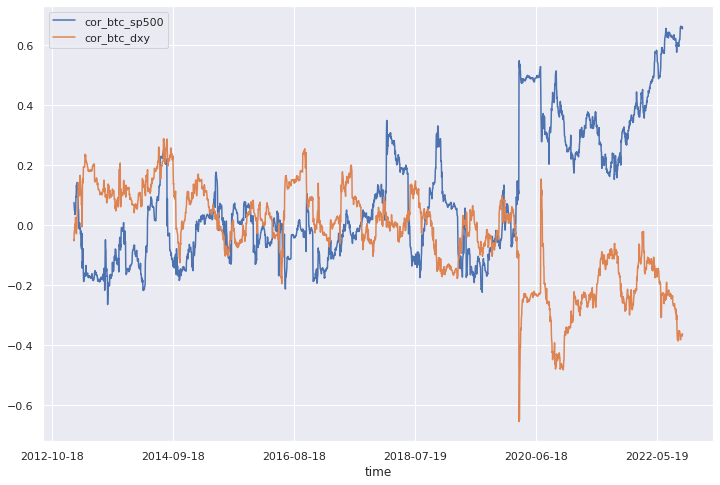

In [29]:
from matplotlib.pyplot import plot
plot = cor.plot(x="time", y=["cor_btc_sp500", 'cor_btc_dxy'])

In [30]:
fig = plot.get_figure()

In [31]:
from matplotlib import pyplot as plt

fig.savefig('foo.png')